# Project 1: MNIST dataset using TPOT

This is my initial foray into Jupyter Notebooks, data science in Python, and machine learning. I'll be keeping detailed notes on my exploration.

I will be using TPOT to train a model on the MNIST dataset. The MNIST dataset consists of hand written digit, 0-9, and their associated labels. We're teaching the model to identify these hand written digits.

TPOT is an automated machine learning tool. With this tool, you set a few parameters, point it at your data, and it comes up with an optomized machine learning pipeline for your data. The idea is that we can start to play with machine learning concepts and tools without having to worry too much about the technical details of picking and optimizing a model.

We'll be following the basic example in TPOT's docs just to get an initial feel then playing around with the params and data.

[TPOT GitHub](https://github.com/EpistasisLab/tpot)
[TPOT Docs](http://epistasislab.github.io/tpot/)

If you want to run this code yourself and are starting from scratch, here's how to get your environment setup for this notebook:

[Install Anaconda](https://www.anaconda.com/download/)

The tpot installation commands:

> conda install numpy scipy scikit-learn pandas

> pip install update_checker tqdm stopit

TPOT's official docs just say to install deap. I had to run this:

> pip install deap==1.0.2.post2

> pip install tpot


Open up this notebook with:
> jupyter notebook mnist-tpot.ipynb

# Let's figure out TPOT

#### Import your modules:

You're familiar with TPOT, but we're also importing sklean here. Scikit Learn is the real workhorse here. It has the built in machine learning algorithms and tools that underlie TPOT. 

Note that we're cheating a bit (ok...alot) on the dataset here. Scikit Lean has built in sample data sets. These happen to include MNIST, so we're just loading that.

In [1]:
# TPOTClassifier is what will be doing the bulk of our ML work for us.
from tpot import TPOTClassifier
# This is the sample MNIST dataset included with sklearn.
from sklearn.datasets import load_digits
# We discuss the use of train_test_split in the next section.
from sklearn.model_selection import train_test_split

#### Load your data:

In the next step we're loading the data then splitting into 4 sections. Understanding these splits is fundamental to understanding machine learning.

Machine learning is really just about finding patterns in our data. But it's possible that we do too good of a job at finding patterns or find patterns that aren't really what we want. This is called overfitting.

Imagine you want a model that classifies pictures of vehicles as either cars or trucks. Your model figures out that the pictures of trucks all have trees in the background and the cars don't, so that's how your model decides to detect 'car' vs 'truck'.  The problem here is that your model learned how to answer your question based on your data, but it doesn't really know how to detect what a car is.

That previous example is probably a little too simple. A real ML algorithm tends to detect patterns in ways that we can't predict and aren't as clear cut as seeing trees. 

[Here's Google's in-depth explanation of overfitting, if you're interested](https://developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting)

How do we know if we've overfit?

We need training data to actually train the model and test data to make sure that we didn't just exactly learn the training data. Holding some data out for testing and validation purposes helps us prove that we didn't just overfit our model to our training data. We're using 75% of the data for training and 25% for testing.

That's our first split.

All of that data is then subdivided into the data (the picture. 'X' in this case) and the target (the label for the picture. Or 'y'). This is so we can tell the traning algorithm what it's trying to predict.

That's our second split.

Side note: We aren't actually 'looking at' pictures here. Each column in this dataset is a number representing the intensity of a pixel in the picture. Our model doesn't care what the picture literally looks like to a human. It just needs to be able to figure out a pattern in the picture.

In [2]:
# Load our data
digits = load_digits()
# This is where we actually get our 4 way split.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

#### Actaully creating a machine learning pipeline:

This is the training example given in the TPOT docs for training. It scores a 98%, as advertised (98.66% to be exact).

Let's break down what's happening here.

1. TPOT has a Classifier and a Regressor class. Regressors guess a value. The classic example of this is guessing the price of a house. Classifiers are used to guess among distinct classes. The obvious example here being one of ten (0-9) possible digits. We're using TPOTClassifier. TPOT is using genetic programming to find an optimized machine learning pipeline for your data. The basics here are that TPOT trains a population (20 in our case), determines the best scoring models, then uses that information to inform what models are tested in the next generation (we're using 5 generations). The "verbosity=2" just gives us the nice little progress bars and updates on accuracy over the generations.

2. "tpot.fit(X_train, y_train)" is just the equivalent of saying "Go train. Use the training data".

3. "tpot.score(X_test, y_test)" is where we get to see how our model actually did. We'll get printouts of how each generation did, but this is where we actually get to see how the model works on new data.

4. We save out generated pipeline to a file.

In [4]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline_v1.py')

Generation 1 - Current best internal CV score: 0.962925749821777
Generation 2 - Current best internal CV score: 0.9644405945378646
Generation 3 - Current best internal CV score: 0.9666600833994199
Generation 4 - Current best internal CV score: 0.9666600833994199
Generation 5 - Current best internal CV score: 0.9858739654641543

Best pipeline: LogisticRegression(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), C=10.0, dual=True, penalty=l2)
0.9866666666666667


True

# Ok...what did we just do?

Each generation (ever 20 pipelines) outputs the accuracy score of the top performing ML pipeline so far. So our first generation had a top performer of 96.29% and we finished out at 98.58%. 

Here's the really important part: Those number are only for the training data.

We don't see how our model performs on the test data until the end (the `tpot.score(X_test, y_test)`). This statement prints out the top performing pipeline, runs it with the testing data, and prints your final score. This is data that your model hasn't seen yet. This is the real deal.

Our model performs at 98.66% on the testing data. 

TPOT creates a nice little ML pipeline file at the end so that you can reproduce these results, but let's ignore that for now.


# Let's do it big

Before we actually go in depth, let's just do it big by:
- Running it longer by upping our generations and population_size
- Using more cores by setting n_jobs=3 (use 3 CPU cores instead of 1).
- Saving our progress to a folder by using periodic_checkpoint_folder (just in case my Windows desktop decides it wants to reboot in the night).

In [4]:
tpot = TPOTClassifier(generations=50000, population_size=200, n_jobs=3,
                      periodic_checkpoint_folder='./mnist-tpot-checkpoint-2', verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline_v2.py')

Generation 1 - Current best internal CV score: 0.9851344299283016
Generation 5 - Current best internal CV score: 0.9873535711606
Generation 8 - Current best internal CV score: 0.9873671385770925
Generation 9 - Current best internal CV score: 0.9888708984478656
Generation 13 - Current best internal CV score: 0.9895980512222403
Generation 16 - Current best internal CV score: 0.9896031703143171
Generation 17 - Current best internal CV score: 0.991096262627164
Generation 25 - Current best internal CV score: 0.9910990368600888
Generation 26 - Current best internal CV score: 0.991828963867388
Generation 27 - Current best internal CV score: 0.9918425312838807
Generation 29 - Current best internal CV score: 0.992547668317347
Generation 32 - Current best internal CV score: 0.9925724582911798
Generation 43 - Current best internal CV score: 0.9932996110655544
Generation 91 - Current best internal CV score: 0.9933131784820471
Generation 162 - Current best internal CV score: 0.9933159527149715
Gene


Best pipeline: KNeighborsClassifier(RandomForestClassifier(LogisticRegression(GradientBoostingClassifier(RFE(input_matrix, criterion=entropy, max_features=0.55, n_estimators=100, step=0.15000000000000002), learning_rate=1.0, max_depth=1, max_features=0.8500000000000001, min_samples_leaf=6, min_samples_split=5, n_estimators=100, subsample=0.25), C=1.0, dual=False, penalty=l1), bootstrap=False, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=14, n_estimators=100), n_neighbors=2, p=2, weights=distance)
0.9844444444444445


True

#### Ok...too big

My assumpiton with my last pipeline was that it might run for a week. At 60 hours of training it was only 1% done. This would've taken months. Time to Ctrl+C and lick my wounds.

If I was doing this over again I would've set these parameters:

* max_time_mins=4320
* early_stop=150
* \[REMOVE\]generations=50000

The "max_time_mins" is the amount of time you'll allow the pipeline to run. This variable overrides generations. I would've gone with 3 days (4,320 minutes).

The "early_stop" variable will stop TPOT if there is no improvement over the specified number of generations. This number is honeslty fairly random. Our final jumps were coming at (very roughly) every 100 generations. 150 feels like a nice, safe buffer.

#### So, how'd we do?

I've cut out all of the repeat generations so that you can get a better idea of the pipeline at a glance.

Remember when I talked about why we seperate out some test data? This training exercise is an example of why. Let's recap:

|Run Num | Training Accuracy | Testing Accuracy|
|--------|-------------------|-----------------|
|1       |98.59%             |98.66%           |
|2       |99.40%             |98.44%           |

In comparison to the first pipeline, our accuracy on training data was +0.81% and our accuracy on testing data was -0.22%.

It turns out that our 2nd pipeline was a little too good at detecting patterns in our training data. There's not too much we can do here. TPOT doesn't have a "chill out on the overfitting" parameter. Our best bet is just adding more data. More data is going to mean that there's less coincidental patterns in our training subset and therefore less opportunity for overfitting.

##### ....so I need to start writing down numbers?

Nope! Remember how we used the built in Scikit-Learn MNIST data set? Well that's just a sample of the real thing. Scikit's data set consists of 1797, 8x8 pixel images. The real MNIST dataset is 70,000, 28x28 images.


# Let's play with some data

[Here's a link to download the MNIST data from Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv/downloads/mnist-in-csv.zip/2)

If you want to follow along: I've unzipped the files into a directory named "mnist-data", within the same directory as this notebook. You can either download and unzip the data yourslef or just follow along in the notebook.

Technically we don't need to go get the raw data ourselves. Scikit learn has functions for downloading the entire dataset, but I purposely want a more vanilla approach.

Here's how you'd do it with scikit:
```
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=mnist-data)
```

#### Ok, here we go:

We going to import pandas, a data analysis python library. Pandas works in units of data called data frames. Pandas is smart enough to load the data from the CSV and understand what the column headings mean.

In [2]:
import pandas as pd

# Load the data from our CSV
training = pd.read_csv('mnist-data/mnist_train.csv')
test = pd.read_csv('mnist-data/mnist_test.csv')

# Let's see our first 5 rows:
print(training.head())
print(test.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...        0      0   
1      0    0    0    0    0    0    0    0    0    0  ...        0      0   
2      4    0    0    0    0    0    0    0    0    0  ...        0      0   
3      1    0    0    0    0    0    0    0    0    0  ...        0      0   
4      9    0    0    0    0    0    0    0    0    0  ...        0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...        0  

As I mentioned earlier: Our data here is actually 28 X 28 pixel picuture digested into 784 columns, each representing the intensity of a particular pixel. Column number 1 is our label. How many pieces of data come in the full set?

FYI: The key ML jargon below is 'shape'. Shape represents the dimensions of the data you're working here. The numbers printed here represent (Nubmber of rows, number of columns).

In [15]:
print(f'training: {training.shape}')
print(f'test: {test.shape}')

training: (60000, 785)
test: (10000, 785)


Ok, so we have 60,000 pieces of traning data and 10,000 for testing. The data already came with the train vs test split. Let's make the label vs data split.

We saw in the head command that the label column is literally called 'label'

In [3]:
# Make a new dataframe using only the labels
training_labels = training.label
# Make a new dataframe, but just drop the labels column
# 'axis=1' means drop the column heading too.
training_data = training.drop('label', axis=1)
test_labels = test.label
test_data = test.drop('label', axis=1)

# Let's confirm we get the right shapes.
# We should expect a single column for the labels and 784 for the data.
print(f'training_labels: {training_labels.shape}')
print(f'training_data: {training_data.shape}')
print(f'test_labels: {test_labels.shape}')
print(f'test_data: {test_data.shape}')

# Let's also give the data a visual once-over
print('training_labels.head():')
print(training_labels.head())
print('test_data.head():')
print(test_data.head())


training_labels: (60000,)
training_data: (60000, 784)
test_labels: (10000,)
test_data: (10000, 784)
training_labels.head():
0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64
test_data.head():
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...    28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...        0      0   
1    0    0    0    0    0    0    0    0    0     0  ...        0      0   
2    0    0    0    0    0    0    0    0    0     0  ...        0      0   
3    0    0    0    0    0    0    0    0    0     0  ...        0      0   
4    0    0    0    0    0    0    0    0    0     0  ...        0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0     

#### 784 columns is....boring

Let's have a little data exploration side bar.

1. I want to see what our numbers actually look like. Creating a handwritten digit reconizer on handwritten digits that you've never seen feels silly.

2. Once we have a model trained, I'd like to explore what digits it gets wrong. What if I can't tell what the digit is either?

We're going to use matplotlib's imshow for this task. This library is for creating 2D graphs in python.

I use the term *features* in the comments below. Note that that's a formal term in machine learning. It really just means the all of the columns of data that get fed into the machine learning algorithm, minus the label or target column. In our case the features are all of the columns representing pixel intensity in our picutes.

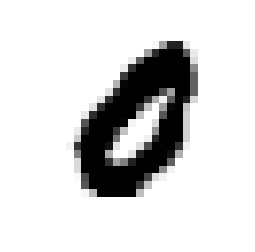

In [38]:
# Let's matplotlib do it's magic inside of the notebook:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

# Let's load a random sample digit from the dataframe.
# If you've been actively following along I reccomend mashing that 'Run' button a few times.
our_number = training_data.sample(n=1)

# Let's take our flat 784 features and reshape it into a 28x28 graph
# Note that pandas doesn't have a reshape method, but pandas is built on numpy
# and numpy has reshape. Access the numpy methods with values.reshape()
our_number_shaped = our_number.values.reshape(28, 28)

# cmap=matplotlib.cm.binary: "Make bigger numbers darker"
plt.imshow(our_number_shaped, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()



# Time to see what this puppy can do

We now have a bigger, meaner dataset. Let run the something akin to our "do it big" pipeline, but incorporating our lessons learned.

I'm not going to mark this code up as much. We've already explored it before. Just note:

1. The use of our new data.
2. Given the increased size of the dataset, I'm lowering the population size back down to 20. This dataset will take much longer per individual pipeline.

In [ ]:
tpot = TPOTClassifier(max_time_mins=4320, population_size=20, n_jobs=3,
                      periodic_checkpoint_folder='./mnist-tpot-checkpoint-3',
                      early_stop=150, verbosity=2)
tpot.fit(training_data, training_labels)
print(tpot.score(test_data, test_labels))
tpot.export('tpot_mnist_pipeline_v3.py')

Generation 1 - Current best internal CV score: 0.9113000880027429
Generation 3 - Current best internal CV score: 0.9115168394202222
Generation 4 - Current best internal CV score: 0.9127834949991644
Generation 5 - Current best internal CV score: 0.9147335715485821
Generation 6 - Current best internal CV score: 0.9152667826606102
Generation 13 - Current best internal CV score: 0.9154835187969583
Generation 14 - Current best internal CV score: 0.9157668326564613
Generation 15 - Current best internal CV score: 0.9165667299923047
Generation 17 - Current best internal CV score: 0.9215666886610293
Generation 18 - Current best internal CV score: 0.9579333233149008
Generation 31 - Current best internal CV score: 0.9617832097310728
Generation 37 - Current best internal CV score: 0.9668832906676232
Generation 39 - Current best internal CV score: 0.9685000616054886
Generation 56 - Current best internal CV score: 0.9691833005267713
Generation 57 - Current best internal CV score: 0.96948338808337
Ge

Optimization Progress: 1855pipeline [54:25:43, 990.44s/pipeline] 

#### Another early stop

The middle of the night Windows reboot struck last night. We made it 64 generations, 54 hours, and 96.99% accuracy into the last traning. This will acctually be a good opportunity to look at the pipeline that TPOT produced and get our own numbers for accuracy on the testing data.

Remember, we segt out checkoutpoint folder using `periodic_checkpoint_folder='./mnist-tpot-checkpoint-3'`. The most advanced pipeline in that directory is `pipeline_2018.08.15_02-58-33.py`. Here's the code with my comments:

```python
#Numpy is the scientific calculator of python.
import numpy as np
import pandas as pd
# Importing the actual ML alogrithms that will be used by the pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Importing other sklearn utils. Will address lower down.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
# Importing a few TPOT utils.
from tpot.builtins import OneHotEncoder, StackingEstimator

# Load your data:
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# Pull out your features. Note that in this code they assume the label column is named 'target'.
features = tpot_data.drop('target', axis=1).values
# Create the 4 way split.
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.9699834298007317
# We're going to break this down in detail below
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.05, min_samples_leaf=1, min_samples_split=6, n_estimators=100)),
    OneHotEncoder(minimum_fraction=0.25, sparse=False),
    MinMaxScaler(),
    LogisticRegression(C=25.0, dual=False, penalty="l1")
)

# Train a model using the new pipeline
exported_pipeline.fit(training_features, training_target)
# Feed test features to the trained model.
results = exported_pipeline.predict(testing_features)
```

### Our pipeline

Let's try to make sense of each step in `make_pipeline`.

- [StackingEstimator](https://github.com/EpistasisLab/tpot/blob/master/tpot/builtins/stacking_estimator.py) - TPOT class used to create synthetic features to feed into the models. 
    - [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) - This is the machine learning algorithm that is used to transform the features that are later fed back into other machine learning algorithms. [Random forests](https://en.wikipedia.org/wiki/Random_forest) consist of [decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning). These desicions trees are small machine learning model themselves. Each tree is trained on a random subset of the data. We then combine the output of all of the trees (the forest) for our final output. The fact that all of the smaller models are trained on random sub sets of data helps prevent overfitting.
        - bootstrap = Use random samples of data for each tree.
        - criterion = This is the function that is used to construct the decision trees. "gini" is the default and should be left that way. “entropy”, the alternative, is slower and only slightly better sometimes.
        - max_features = The number of features to consider when determining the splits between classes in the classifer (this is at the tree level).
        - min_samples_leaf = "Leaves" are the classes that the tree will classify the features into. This is saying we need at least 1 sample of a particualr class in that tree in order to create a leaf for the class.
        - min_samples_split = The minimum number of samples needed to make the decision to split a leaf.
        - n_estimators = The number of trees in the forest.


- [OneHotEncoder](https://github.com/EpistasisLab/tpot/blob/master/tpot/builtins/one_hot_encoder.py) - Machine learning models tend to like descrete classes, rather than strings or values. One hot encoding technique for transforming data so that it fits this model better. For example, imagine you have a column that reads 'Car Make' and your individual items in the table have values like 'Chevy' or 'Ford'. One hot encoding creates a column for 'Chevy' and a column for 'Ford'. So your car that previously had "Car Make: Ford" would now have "Chevy: 0, Ford: 1, BMW: 0". 

    **Note** These features are not well documented. These are my best guesses
    - minimum_fraction = Take the bottom X% of categories and catergorize under 'other'
    - sparse = Whether we should assume there will be missing data


- [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - Scales all of our feature to be 0-1, from 0-255. Note that at this point we're still transforming our data before feeding it into the final algorithm. We've used models to change the data, but we still don't have models that classify our picutes of digits into numbers yet.


- [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) - [Here's a good walkthrough on logistic regression and classification](https://developers.google.com/machine-learning/crash-course/classification/video-lecture). Essentially, our model will calculate the likelihood that each picture is of a particular class. The model when then output the most likely class.

    We need to talk about graphs, weights, and regularization to understand these next parameters.
    
    Machine learning can most simply be thought of as really complex graphs drawn by machines. Imagine you have a simple 2D graph with an X and Y axis. X is your feature and Y is your label. Imagine a scatter of datapoints on your graph. You do your best to draw a line that represents the data. Now if I remove all of the data points, just leave the line you drew, and give you a new value of X, you could give me a rough esimate of the new Y. The line that you drew is essentially a 'model' in machine learning.
    
    Now we need to exapand our graph to 3D space. Imagine three points floating in the air. These are your X, Y, and Z axis. You have to draw a line through these points. Where do you draw the line? The exact center of the three points? What if one of the values is twice as important as the other? You need to develop a function for determining how heavily you would weight the line toward one datapoint or the other. After you've figured out how to weight your data, you can imagine a series of these 3D points, a (weighted) line drawn through them, and the resulting model snaking around the room.
    
    Machine learning models do this, but they do it at much higher complexities than can be calcualted by a human. We just used 2D and 3D space. Our model is working with 60,000 pieces of traning data in 784D space.
    
    So now that we understand that weights are used to determine how strongly certain nodes in our graph are linked, we can talk regularization.

    Regularization is another very important concept in machine learning. Large outliers in our data are going to skew results and cause overfitting. We 'regularize' the data by bringing the **weights** all closer to the center (closer to zero). All of our arguements revolve around how the model should regularize. We're telling the model how it shoud tweak weights while it's calculating our model.
    
    - C = Smaller values mean stronger regularization
    - dual = I'm not sure...I can't find any resources that aren't more math than I know. The docs say you can only use this with l2 regularization, and we're using l1, so I don't think this matters anyway.
    - penalty = Set l1 or l2 reqularization. L1 will drive weights to zero, whereas l2 will just drive weights close to zero.

### Testing our pipeline

Due to our early stop we didn't get to see how our newest pipeline performed on the testing data. Let's edit the pipeline code TPOT gave us and see how it works.

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import OneHotEncoder, StackingEstimator

# TPOT's pipeline boilerplate has some expectations around how the data should look.
# I'm going just use our code from earlier, updating 'data' to our new 10 cent word, 'feature'.
training = pd.read_csv('mnist-data/mnist_train.csv')
test = pd.read_csv('mnist-data/mnist_test.csv')
training_labels = training.label
training_features = training.drop('label', axis=1)
test_labels = test.label
test_features = test.drop('label', axis=1)

# Score on the training set was:0.9699834298007317
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.05, min_samples_leaf=1, min_samples_split=6, n_estimators=100)),
    OneHotEncoder(minimum_fraction=0.25, sparse=False),
    MinMaxScaler(),
    LogisticRegression(C=25.0, dual=False, penalty="l1")
)

# This actually trains our model on our pipeline
exported_pipeline.fit(training_features, training_labels)
# Let's see our accuracy on testing data.
print(f'Testing accuracy: {exported_pipeline.score(test_features, test_labels)}')


Testing accuracy: 0.9716


### How'd we do?

Below is the chart with trainging and testing accuracy for all three runs. The third run gave us less accuracy than before, but we were also interrupted early.

|Run Num | Training Accuracy | Testing Accuracy|
|--------|-------------------|-----------------|
|1       |98.59%             |98.66%           |
|2       |99.40%             |98.44%           |
|3       |96.99%             |97.16%           |

### Let's dig through our data

Below I'm creating a function to pull out a specific number, print its index, label, and prediction, then plots the picture.

Index: 5003
Label: 8
Prediction: 8


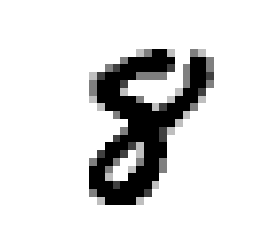

In [60]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def print_prediction(index, test_features, test_labels):

    # iloc is a pandas method that allows to access dataframe rows by index number
    our_number = test_features.iloc[index]

    # Reshape our data. We need a 28x28 array for graphing and a single row for prediction.
    our_number_shaped_for_graphing = our_number.values.reshape(28, 28)
    our_number_shaped_for_prediction = our_number.values.reshape(1, -1)

    print(f'Index: {index}')
    print(f'Label: {test_labels.iloc[index]}')
    # exported_pipeline.predict does our actual prediction.
    # This returns a list, so we're just grabbing the single return value with [0]
    print(f'Prediction: {exported_pipeline.predict(our_number_shaped_for_prediction)[0]}')
    plt.imshow(our_number_shaped_for_graphing, cmap=matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

# Just a quick test
index = 5003
print_prediction(index, test_features, test_labels)

#### What does the model get wrong?

I'd like to see some examples of numbers the model gets wrong. Let's print out the first 20 incorrect digits.

Index: 124
Label: 7
Prediction: 4


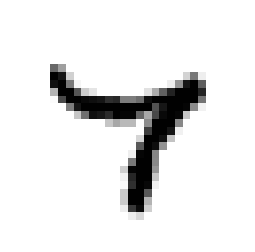

Index: 222
Label: 2
Prediction: 8


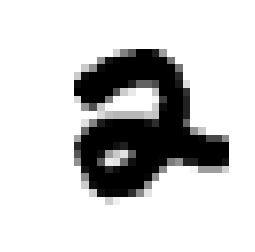

Index: 241
Label: 9
Prediction: 8


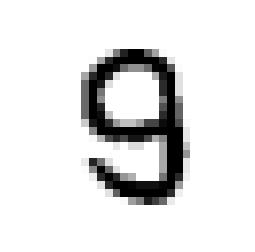

Index: 247
Label: 4
Prediction: 2


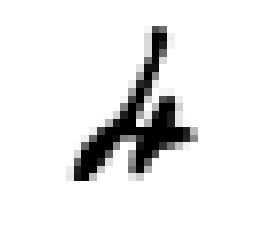

Index: 259
Label: 6
Prediction: 0


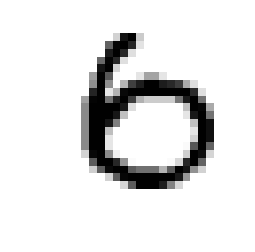

Index: 320
Label: 9
Prediction: 1


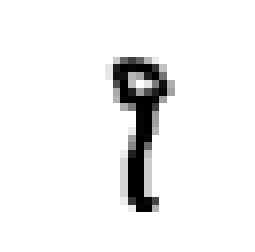

Index: 321
Label: 2
Prediction: 7


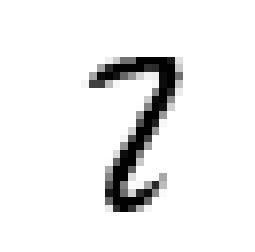

Index: 340
Label: 5
Prediction: 3


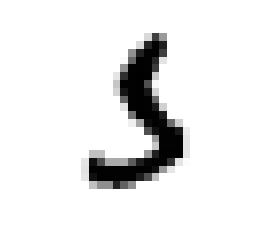

Index: 381
Label: 3
Prediction: 7


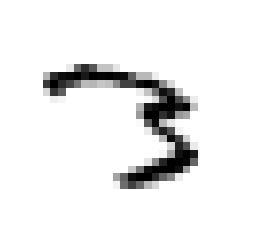

Index: 445
Label: 6
Prediction: 0


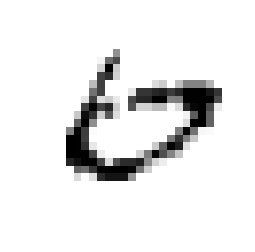

Index: 447
Label: 4
Prediction: 9


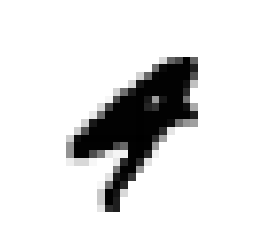

Index: 448
Label: 9
Prediction: 8


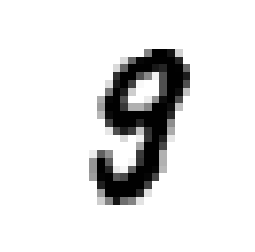

Index: 449
Label: 3
Prediction: 5


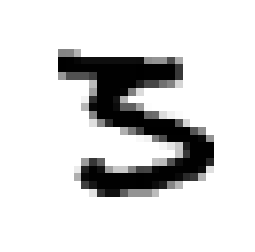

Index: 495
Label: 8
Prediction: 0


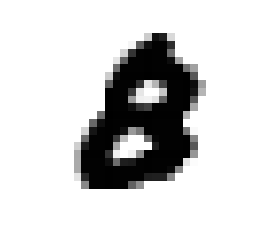

Index: 578
Label: 3
Prediction: 7


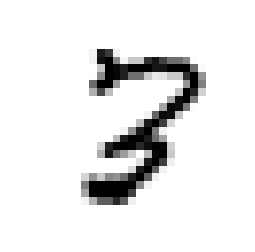

Index: 582
Label: 8
Prediction: 2


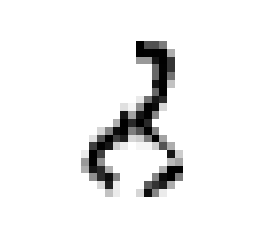

Index: 646
Label: 2
Prediction: 6


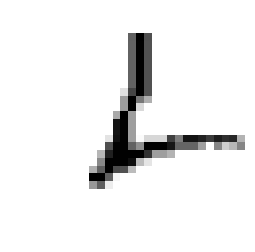

Index: 659
Label: 2
Prediction: 8


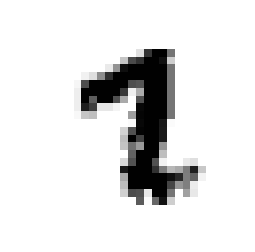

Index: 684
Label: 7
Prediction: 2


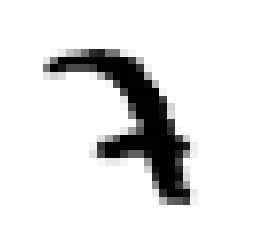

Index: 717
Label: 0
Prediction: 6


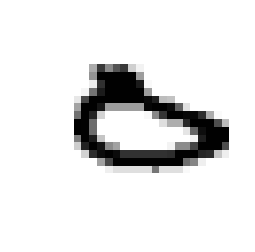

In [63]:
# Make predictions on the entire testing set
test_results = exported_pipeline.predict(test_features)

incorrect_predictions = []

# Loop through our pandas data and fill out incorrect_predictions with indexs of incorrect guesses
for index, digit in test_labels.iteritems():
    if digit != test_results[index]:
        incorrect_predictions.append(index)

# Print out the first 20 incorrect guesses
for index in range(20):
    index = incorrect_predictions[index]
    print_prediction(index, test_features, test_labels)


### Thoughts on the incorrect guesses

A few of the predictions aren't great. With many of them, you can tell what the model was 'thinking'. And a few of the handwritten digits seem to be written in an alien language. 

##### Bad predictions:

Indexes 222, 241 and 495 are good examples of just plain bad perdictions. These might not be the best handwriting in the world, but our model should surely regonize these. This really does indicate to me that we have some serious room for improvement in our model. 

##### I see what you were doing:

Indexes 320, 321, and 447 are images that I'm not sure if I would've been right or wrong on. They're ambigious in a way that I'm not suprised the algorithm got them wrong, but these might be potential accuracy points that could be picked up.

##### New, alien languages:

Indexes 582 and 646 are proof that we won't ever get 100% accuracy. There's no way I would expect even a human to get these right.

# That's it

We've trained 3 different models that are capable of reading hand written digits, explored the data, and covered some machine learning basics.

I'm considering coming back to this notebook to make an actual tool where you could take a picture of a handwritten digit, upload it to a website, and get a prediction, but I've other things to work on for now.

Here's some considerations to chew on when thinking about how you would turn this into a product:

- How would you get the picutres into the right format? You'd have to take any picture that someone gave you, turn it into a 28x28 pixel, black and white picture, and convert the pixel intensity to a 0-255 scale. What if they used black paper with a white pen? What if the picture wasn't centered? 

- How would you export the model? As it currently stands, you don't actually have a trained model that you could move around. You literally have to train the model whenever you want to use it. You could run it as a deamon on a server and make prediction on the fly, but you'd still have to re-train on every reboot. You'd probably use [pickle](http://scikit-learn.org/stable/modules/model_persistence.html), but there are likley better methods.